
## 1- Analyse via classification automatique K-Means:  
- **Question** : Comment les dépenses en éducation (% du PIB) et le PIB par habitant influencent-ils le regroupement des pays asiatiques ?
### Indicateurs sélectionnés :  
- **Depenses_en_education_PIB**  : Part des dépenses publiques allouée à l'éducation en pourcentage du PIB. 
- **PIB_par_habitant**  :C'est le PIB divisé par la population totale d'un pays.

## Objectifs de l'analyse :
Identifier des groupes de pays ayant des caractéristiques économiques et sociales similaires en termes de dépenses en éducation et de niveau de vie (PIB par habitant

Explorer les relations entre les priorités éducatives des pays et leur niveau économique, et déterminer si des tendances évidentes peuvent être observées à travers les clusters obtenus.

1-Importation des bibliothèques nécessaires

In [32]:
# Importation des bibliothèques nécessaires
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## k-means clustering

2-Ne conserver que les colonnes nécessaires dans ce dataset data_cleaned.csv, en se concentrant sur les informations concernant les dépenses en éducation (Depenses_en_education_PIB) et le PIB par habitant (PIB_par_habitant) pour différents pays

In [33]:
# Charger le dataset
df = pd.read_csv("data_cleaned.csv")

# Ne conserver que les colonnes nécessaires
columns_to_keep = ['Country', 'Depenses_en_education_PIB', 'PIB_par_habitant']
data_dr = df[columns_to_keep]

# Afficher les 10 premières lignes
print(data_dr.head(10))


             Country  Depenses_en_education_PIB  PIB_par_habitant
0        Afghanistan                   4.142351        510.787063
1            Armenia                   2.705560       4268.680933
2         Azerbaijan                   4.332050       4229.910649
3            Bahrain                   2.552375      24342.844455
4         Bangladesh                   1.765281       2248.850788
5             Bhutan                   5.543413       3191.669070
6  Brunei Darussalam                   5.683393      26834.359246
7           Cambodia                   3.002350       2081.739142
8              China                   4.233381      10408.719554
9             Cyprus                   5.636940      28649.015625


3-Visualisation des données avant le clustering K-means

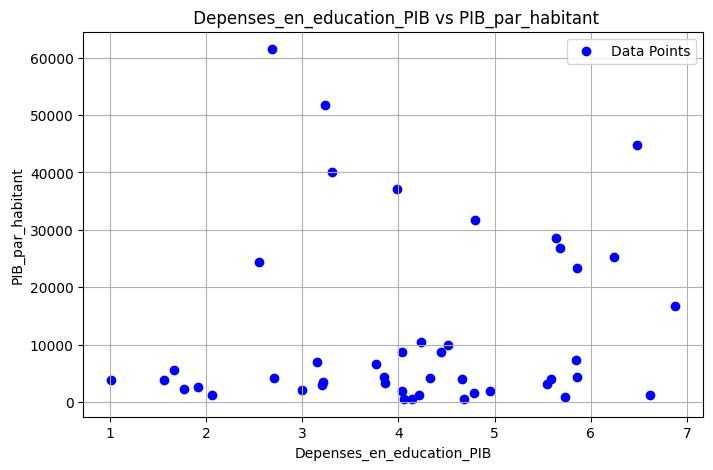

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(data_dr['Depenses_en_education_PIB'], data_dr['PIB_par_habitant'], color='blue', label='Data Points')
plt.title(' Depenses_en_education_PIB vs PIB_par_habitant')
plt.xlabel('Depenses_en_education_PIB')
plt.ylabel('PIB_par_habitant')
plt.legend()
plt.grid(True)
plt.show()

- Pas de corrélation linéaire évidente entre les deux variables. Cela signifie qu'un pays dépensant beaucoup en éducation n'a pas systématiquement un PIB par habitant élevé, et vice versa.
- semble y avoir quelques zones où les points se concentrent davantage, suggérant qu'il pourrait exister des groupes de pays avec des caractéristiques similaires en termes de dépenses en éducation et de PIB

Ensuite, les données sont normalisées à l'aide de StandardScaler, ce qui est une étape recommandée afin de s'assurer que chaque variable contribue de manière égale à la formation des clusters. La normalisation permet de rendre les distances entre les points plus cohérentes, surtout lorsque les variables ont des échelles différentes. Après la normalisation, nous appliquons K-means pour un nombre de clusters compris entre 1 et 10, et nous calculons l'inertie pour chaque valeur de k. L'inertie est utilisée pour évaluer la qualité des clusters formés : une inertie plus faible indique généralement des clusters plus cohérents. Ces valeurs d'inertie seront ensuite utilisées pour déterminer le nombre optimal de clusters

In [35]:
# Préparer les données pour le clustering
X = data_dr[['Depenses_en_education_PIB', 'PIB_par_habitant']]

# Normaliser les données (optionnel mais recommandé)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

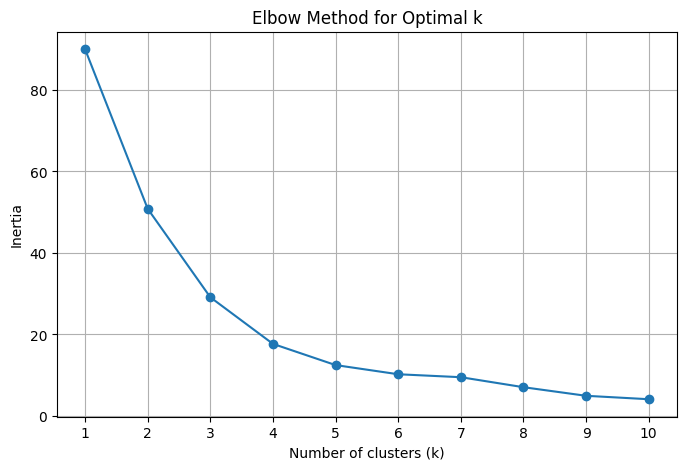

In [36]:
# Tracer le graphique de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia') 
plt.xticks(k_range)
plt.grid(True)
plt.show()

- La courbe de coude montre l'inertie en fonction du nombre de clusters k dans l'algorithme K-means. On peut observer qu'il y a une réduction significative de l'inertie entre k=1 et k=3, puis une diminution plus lente et progressive après k=3. Ce "coude" à k=3 indique que l'ajout de clusters supplémentaires ne réduit plus de manière significative l'inertie.
-  ce qui suggère que le nombre optimal de clusters pour ce dataset est 3. Cela signifie qu'un regroupement en trois clusters est suffisant pour modéliser les données sans ajouter de complexité inutile

In [38]:
optimal_k = 3  # Replace with the value found using the elbow method

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_dr.loc[:, 'Cluster'] = kmeans.fit_predict(X_scaled)


Le nuage de points est affiché avec une droite de régression (en rouge) qui représente la relation linéaire entre Advertisements et les Sales.

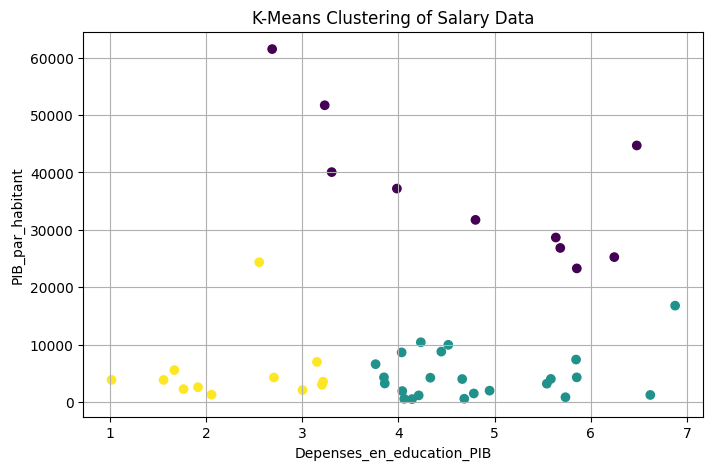

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(data_dr['Depenses_en_education_PIB'], data_dr['PIB_par_habitant'], c=data_dr['Cluster'], cmap='viridis', label='Clusters')
plt.title('K-Means Clustering of Salary Data')
plt.xlabel('Depenses_en_education_PIB')
plt.ylabel('PIB_par_habitant')
plt.grid(True)
plt.show()

- Hétérogénéité des pays asiatiques: Les pays asiatiques ne forment pas un groupe homogène en termes de dépenses en éducation et de niveau de développement. Le clustering a permis d'identifier plusieurs groupes de pays avec des caractéristiques distinctes.
- Pays à fort investissement dans l'éducation et à haut revenu: Ces pays ont des politiques éducatives ambitieuses et un niveau de vie élevé.
- Pays à investissement moyen dans l'éducation et à revenu intermédiaire: Ces pays accordent une importance à l'éducation mais font face à des contraintes financières.
- Pays à faible investissement dans l'éducation et à faible revenu: Ces pays ont des systèmes éducatifs moins développés et des niveaux de vie plus modestes.

In [40]:
# Créer une liste pour stocker les sous-tables par cluster
clusters = []

# Parcourir les clusters uniques
for cluster in sorted(data_dr['Cluster'].unique()):
    # Filtrer les lignes correspondant au cluster courant
    cluster_table = data_dr[data_dr['Cluster'] == cluster]
    clusters.append(cluster_table)
    print(f"Cluster {cluster}:")
    print(cluster_table)
    print("\n")  # Ajouter une ligne vide entre chaque table


Cluster 0:
                 Country  Depenses_en_education_PIB  PIB_par_habitant  Cluster
6      Brunei Darussalam                   5.683393      26834.359246        0
9                 Cyprus                   5.636940      28649.015625        0
15                Israel                   6.478820      44679.771580        0
16                 Japan                   3.306290      40040.765506        0
19           Korea, Rep.                   4.801720      31721.298914        0
20                Kuwait                   6.245131      25236.075552        0
32                 Qatar                   3.233670      51683.505435        0
33          Saudi Arabia                   5.855351      23271.403765        0
34             Singapore                   2.686990      61466.803676        0
41  United Arab Emirates                   3.984180      37173.875410        0


Cluster 1:
                 Country  Depenses_en_education_PIB  PIB_par_habitant  Cluster
0            Afghanistan    

- Les dépenses en éducation et le PIB par habitant sont deux facteurs déterminants dans le regroupement des pays asiatiques. Ils permettent d'identifier des profils-types de pays et de mettre en évidence les disparités en termes de développement et de politiques éducatives. Les pays qui investissent davantage dans l'éducation et qui ont un PIB par habitant plus élevé se regroupent généralement différemment de ceux qui ont des indicateurs plus faibles.

## 2- Analyse via un Test T :
**Question** : Existe-t-il des différences significatives dans les dépenses en éducation entre les pays développés et émergents ?
## Indicateurs sélectionnés :
- **Niveau_de_développement** : Catégorie des pays (développés ou émergents).
- **Dépenses_en_éducation_PIB** : Part des dépenses publiques allouée à l'éducation en pourcentage du PIB.
## Hypothèses :
- **H₀ (Hypothèse nulle)** : Les moyennes des dépenses en éducation (en % du PIB) sont égales entre les pays développés et émergents.
- **H₁ (Hypothèse alternative)** : Les moyennes des dépenses en éducation (en % du PIB) ne sont pas égales entre les pays développés et émergents.

Diviser les données en deux groupes

In [82]:
group_developped = data[data['Niveau_de_developpement'] == 'Élevé']['Depenses_en_education_PIB']
group_emerging = data[data['Niveau_de_developpement'] != 'Élevé']['Depenses_en_education_PIB']

In [84]:
print('developped :', group_developped.mean()) # On affiche la moyenne de l'échantillon pour les pays développés
print('emerging :', group_emerging.mean()) # On affiche la moyenne de l'échantillon pour les pays émergents

developped : 4.615154981370749
emerging : 3.9954038336866384


In [85]:
# test de normalité avec le test de Shapiro-Wilk
from scipy.stats import shapiro

shapiro_developped = shapiro(group_developped)
shapiro_emerging = shapiro(group_emerging)

print("Shapiro-Wilk test pour les pays développés :", shapiro_developped)
print("Shapiro-Wilk test pour les pays émergents :", shapiro_emerging)

Shapiro-Wilk test pour les pays développés : ShapiroResult(statistic=0.9481887508637791, pvalue=0.57111528549601)
Shapiro-Wilk test pour les pays émergents : ShapiroResult(statistic=0.9637584379222639, pvalue=0.34683122855915866)


- Pays développés : pvalue=0.57, on ne rejette pas 𝐻0(les données suivent une distribution normale).
Pays émergents : pvalue=0.34, on ne rejette pas 𝐻0(les données suivent également une distribution normale).
Les deux groupes suivent une distribution normale, ce qui permet d'appliquer le test T de Student.

In [90]:
import scipy.stats as st

t_stat , p_valeur = st.ttest_ind(group_developped, group_emerging) # On fait un test de Student bilateral à 2 échantillons

print('stat=%.3f, p=%.3f' % (t_stat, p_valeur))
alpha = 0.05 # On fixe le seuil de signification à 5%

if p_valeur > alpha:
    print('On accepte H0 : les moyennes sont égales')
else:
    print('On rejette H0 : les moyennes sont différentes')
    


stat=1.275, p=0.209
On accepte H0 : les moyennes sont égales


- La p-value=0.209 est supérieure au seuil α=0.05.
- Cela signifie que nous ne rejetons pas l’hypothèse nulle (𝐻0).
- Il n’y a pas de différence significative entre les moyennes des dépenses en éducation (% PIB) des pays développés et des pays émergents.
- Bien que la moyenne des pays développés (4.62 %) soit légèrement supérieure à celle des pays émergents (4.00 %), cette différence n'est pas statistiquement significative.
- Cela suggère qu’en termes de dépenses en éducation (% PIB), les pays développés et émergents ne présentent pas une distinction nette dans cet échantillon.

- Conclusion : Ces résultats montrent que plusieurs facteurs influencent le revenu et le développement. Les dépenses en éducation restent essentielles, mais d'autres aspects méritent d'être considérés. Une approche globale est donc nécessaire pour favoriser le développement durable en Asie.

###### 3- Analyse via régression linéaire multiple :
**Question** : Quels facteurs contribuent  à la consommation d’énergies renouvelables (% de la consommation totale d’énergie)?
## Indicateurs sélectionnés :
**Consommation d’énergies renouvelables** : Consommation d’énergies renouvelables (% de la consommation totale d’énergie).

**PIB_par_habitant**: e produit intérieur brut (PIB) représente la valeur totale des biens et services produits dans un pays sur une période donnée (généralement une année).

**Accès à l'électricité** : Pourcentage de la population ayant accès à l'électricité.
## Hypothèses :
**H₀ (Hypothèse nulle)** : Aucun des facteurs sélectionnés n’a d’effet significatif sur la consommation d’énergies renouvelables.
**H₁ (Hypothèse alternative)** : Au moins un des facteurs sélectionnés a un effet significatif sur la consommation d’énergies renouvelables.


**Préparation des Données**

1-Importez tous les bibliothèques nécessaires. (par example : numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats...)

In [29]:
import pandas as pd
import matplotlib.pyplot as mb
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


2-Charger les données à partir d'un fichier Excel nommé "data_cleaned.csv" et stockées dans un DataFrame.

In [30]:
data_multible= pd.read_csv('data_cleaned.csv')
data_multible.head()

,Country,PIB_total,"la concentration moyenne annuelle en PM2,5",PIB_par_habitant,Depenses_en_education_PIB,inscriptions au primaire,Consommation d’énergies renouvelables,Esperance_de_vie,Depenses_en_sante_par_habitant,Taux_mortalite_infantile,...,Acces_internet,Croissance_economique,Croissance_PIB_par_habitant,Ratio_dette_PIB,Investissements_directs_etrangers,Emplois_agriculture,Acces_electricite_categorise,Niveau_de_developpement,Acces_eau_potable_categorise,Taux_pauvrete_categorise
0,Afghanistan,1.995593e+10,46.087094,510.787063,4.142351,1.01058,18.2,62.575,80.288055,61.6,...,18.4000,-2.351101,-5.382515,74.400018,0.064994,45.983408,Élevé,Faible,Faible,Faible
1,Armenia,1.264170e+10,30.579633,4268.680933,2.705560,1.01115,8.4,72.173,552.000000,11.3,...,76.5077,-7.200000,-7.168665,63.401214,0.463409,52.383909,Élevé,Intermédiaire,Élevé,Faible
2,Azerbaijan,4.269300e+10,21.727000,4229.910649,4.332050,1.04425,1.3,66.868,243.000000,19.7,...,84.6000,-4.300000,-4.952702,22.189999,1.187904,36.312789,Élevé,Intermédiaire,Élevé,Faible
3,Bahrain,3.583763e+10,58.495063,24342.844455,2.552375,1.01058,0.0,79.174,1105.324829,6.9,...,99.6710,-5.911363,-5.173074,111.598089,2.849732,0.935136,Élevé,Élevé,Élevé,Faible
4,Bangladesh,3.739794e+11,42.381376,2248.850788,1.765281,1.09302,27.2,71.968,50.664131,31.0,...,36.1091,3.448018,2.586478,74.400018,0.407860,38.123203,Élevé,Faible,Élevé,Faible


**Sélection des variables**

In [31]:
Y = data_multible["Consommation d’énergies renouvelables"]
X = data_multible[["PIB_par_habitant", "Acces_electricite"]]

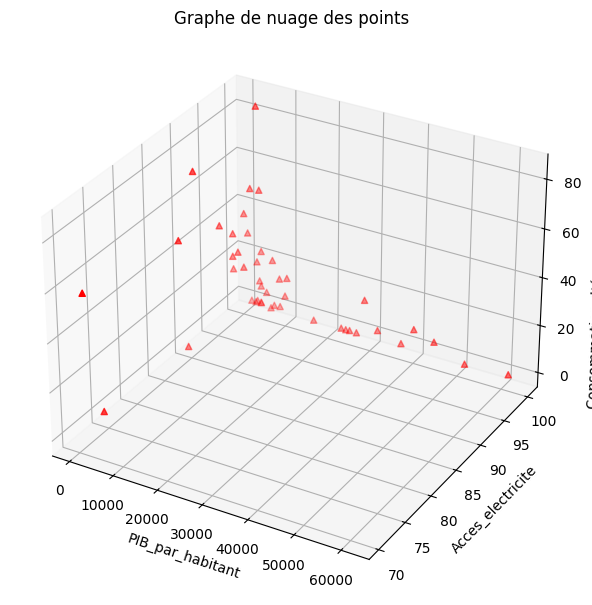

In [32]:
grp = mb.figure(figsize=(16, 10))

ax = grp.add_subplot(121, projection='3d')

ax.scatter(data_multible["PIB_par_habitant"], data_multible["Acces_electricite"], data_multible["Consommation d’énergies renouvelables"], c='r', marker='^')

ax.set_xlabel('PIB_par_habitant')
ax.set_ylabel('Acces_electricite')
ax.set_zlabel('Consommation d’énergies renouvelables')

mb.title('Graphe de nuage des points')

mb.show()


- les points semblent former un plan ou une tendance claire, cela suggère une relation entre les variables

 **Affichage du nuage de points avec la droite de régression**

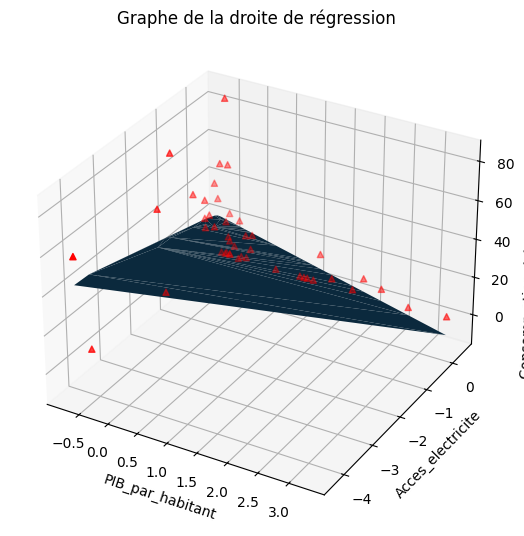

In [33]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X[["PIB_par_habitant", "Acces_electricite"]])

X = sm.add_constant(X_scaled)
model = sm.OLS(Y, X).fit()
# Effectuez les prédictions
Y_predict = model.predict(X)

# Créez une figure avec une taille personalisée
grp = mb.figure(figsize=(14, 9))

# Ajoute un sous-graphique 3D
ax = grp.add_subplot(1, 2, 1, projection="3d")
                      
# Nuage de points avec Les données réelles 
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], data_multible["Consommation d’énergies renouvelables"], c='r', marker='^')

# Ajoutez des étiquettes aux axes ax. set.
ax.set_xlabel ('PIB_par_habitant')
ax.set_ylabel('Acces_electricite')
ax.set_zlabel('Consommation d’énergies renouvelables')


mb.title('Graphe de la droite de régression')


# Tracé de la surface triangulée avec Les prédictions 
ax.plot_trisurf(X_scaled[:, 0], X_scaled[:, 1], Y_predict)

# Affichez la figure
mb.show()







- Les points rouges représentent les données réelles observées de la consommation d’énergies renouvelables en fonction des deux variables explicatives : PIB par habitant (x1) et accès à l'électricité (x2).
- Une surface triangulée (bleue ou une couleur par défaut) représente les prédictions du modèle de régression linéaire.

**Tests de régression**

Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression : -Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus. -Le test de White est utilisé pour détecter l'hétéroscédasticité des résidus. 

In [34]:
# Test de Durbin-Watson
# Calculez la statistique Durbin-Watson (DW)
dw = sm.stats.stattools.durbin_watson(model.resid)

print(f"Statistique Durbin-Watson (DW) : {dw:.2f}")


Statistique Durbin-Watson (DW) : 1.96


- La statistique Durbin-Watson calculée est 1.96, ce qui est proche de 2. Cela suggère qu'il n'y a pas de preuve évidente d'autocorrélation des résidus dans ce modèle. 

In [35]:
# Test de White pour l'hétéroscédasticité

from statsmodels.stats.diagnostic import het_white


# Effectuer le test de white
white_test_statistic, white_test_P_value, fstat, f_P_value = het_white(model.resid, X)


print(f"Statistique de White -- statistique du test : {white_test_statistic: 4f}")
print(f"Statistique de White -- valeur p : {white_test_P_value: 4f}")

if white_test_P_value < 0.05:
     print("hétéroscédasticité détéctée : : la variance des résidus n'est pas constante")
else:
     print("Aucune hétéroscédasticité significative détéctée")


Statistique de White -- statistique du test :  8.273054
Statistique de White -- valeur p :  0.141815
Aucune hétéroscédasticité significative détéctée


- La valeur p est supérieure à 0,05 (niveau de signification usuel), ce qui indique que nous ne rejetons pas l'hypothèse nulle d'homoscédasticité.
- Cela signifie que la variance des résidus est constante, et il n'y a pas de preuve significative d'hétéroscédasticité dans le modèle.
- Le modèle respecte l'une des hypothèses fondamentales de la régression linéaire, à savoir que les résidus ont une variance constante.

**Résumé du modèle**

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [36]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Ajout d'une constante (intercept) pour le modèle
X = sm.add_constant(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Création du modèle de régression linéaire avec statsmodels
model = sm.OLS(Y_train, X_train)

# Ajustement du modèle
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())


                                      OLS Regression Results                                     
Dep. Variable:     Consommation d’énergies renouvelables   R-squared:                       0.415
Model:                                               OLS   Adj. R-squared:                  0.373
Method:                                    Least Squares   F-statistic:                     9.918
Date:                                   Tue, 31 Dec 2024   Prob (F-statistic):           0.000554
Time:                                           23:09:39   Log-Likelihood:                -130.89
No. Observations:                                     31   AIC:                             267.8
Df Residuals:                                         28   BIC:                             272.1
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                 coe

- R-squared = 0.415 :Le modèle explique 41,5 % de la variation de la consommation d’énergies renouvelables. Cela indique une capacité modérée d'explication des facteurs sélectionnés.
- Adj. R-squared = 0.373 : Après ajustement pour le nombre de variables, le modèle explique environ 37,3 % de la variation.
- F-statistic = 9.918, Prob(F-statistic) = 0.000554 :Le modèle global est significatif, indiquant qu’au moins une des variables indépendantes influence la consommation d’énergies renouvelables.
- x1 (PIB_par_habitant) : -5.3742 (p = 0.098)
Cet effet n'est pas significatif au seuil de 0.05. Le PIB par habitant semble avoir un impact négatif sur la consommation d’énergies renouvelables, mais ce résultat reste incertain.
- x2 (Accès à l'électricité) : -22.3870 (p = 0.002)
Cet effet est significatif. Une augmentation de l'accès à l'électricité est associée à une diminution de la consommation relative d'énergies renouvelables.
- L’hypothèse alternative (H₁) est acceptée, car l’analyse révèle que l’accès à l’électricité est un facteur significatif ayant un effet négatif sur la consommation d’énergies renouvelables.

**Calcul de l'Erreur quadratique moyenne (MSE)**

Calculez en prenant la moyenne des carrés des écarts entre les valeurs prédites par le modèle de régression et les valeurs réelles de la variable dépendante et interpréter le résultat. (Utilisez la biblio scikit – learn ou bien Numpy)

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prédictions sur l'ensemble de test
Y_predict_test = results.predict(X_test)

# Calcul du Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_predict_test)
print(f"Mean Squared Error (MSE): {mse}")



Mean Squared Error (MSE): 1494.6968946747934


- Plus le MSE est faible, plus le modèle est précis. Ici, une valeur élevée (1494.70) indique que le modèle présente une erreur moyenne importante dans ses prédictions.


**Calcul de  Coefficient de détermination (R²)**

In [38]:
import numpy as np

# Prédictions sur l'ensemble d'entraînement
Y_train_predict = results.predict(X_train)

# Calcul du SSE (Sum of Squares Error) et SST (Total Sum of Squares)
sse = np.sum((Y_train - Y_train_predict) ** 2)  # Erreur des résidus
sst = np.sum((Y_train - np.mean(Y_train)) ** 2)  # Variance totale

# Calcul du R²
r_squared_manual = 1 - (sse / sst)
print(f'Coefficient de détermination calculé (R²): {r_squared_manual}')


Coefficient de détermination calculé (R²): 0.4146680579336215


- R2 =0.4147, ce qui signifie que 41,47 % de la variabilité de la consommation d’énergies renouvelables (Y) est expliquée par les variables indépendantes (X).
Reste de la variabilité :
- Environ 58,53 % de la variabilité n'est pas expliquée par le modèle, ce qui indique qu'il existe des facteurs ou des relations non inclus dans l'analyse actuelle.

- Conclusion : L'analyse montre que plusieurs facteurs influencent la consommation d’énergies renouvelables. L’accès à l’électricité est essentiel, mais d’autres aspects comptent aussi pour le développement durable en Asie.